In [1]:
#import modules
import sklearn as sk
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('adult2.csv', index_col=False)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Sum                  0
dtype: int64

In [3]:
dfclean = df.dropna() # Drops rows with empty values
dfclean.isnull().sum()
dfclean.loc[dfclean['Age'] > 80].shape[0]

75

In [4]:
dfdropd = dfclean.drop_duplicates()
dfdropd.duplicated().sum()

0

In [5]:
labelencoder = LabelEncoder()
dfcopy = dfdropd.copy()
dfcopy['Race'] = labelencoder.fit_transform(dfcopy['Race'])
dfcopy['Sex'] = labelencoder.fit_transform(dfcopy['Sex'])
dfcopy['Occupation'] = labelencoder.fit_transform(dfcopy['Occupation'])
dfcopy['Relationship'] = labelencoder.fit_transform(dfcopy['Relationship'])
dfcopy['Marital-Status'] = labelencoder.fit_transform(dfcopy['Marital-Status'])
dfcopy['Education'] = labelencoder.fit_transform(dfcopy['Education'])
dfcopy['Workclass'] = labelencoder.fit_transform(dfcopy['Workclass'])
dfcopy['Native-country'] = labelencoder.fit_transform(dfcopy['Native-country'])
dfcopy['Sum'] = labelencoder.fit_transform(dfcopy['Sum'])
dfcopy

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Sum
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [6]:
X = dfcopy[['Fnlwgt']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfcopy['Fnlwgt'] = scaler.fit_transform(X)
dfcopy

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Sum
0,39,5,-1.062676,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,-1.007829,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,0.244669,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,0.425206,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,1.406572,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,0.638926,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,-0.335246,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,-0.358567,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,0.110688,11,9,4,0,3,4,1,0,0,20,38,0


In [7]:
# check distributions of sum > 50k and sum <= 50k 
dfcopy['Sum'].value_counts()


0    22633
1     7506
Name: Sum, dtype: int64

In [8]:
dfcopy['Fnlwgt'].sum()

-3.907985046680551e-12

<AxesSubplot:xlabel='Sum', ylabel='count'>

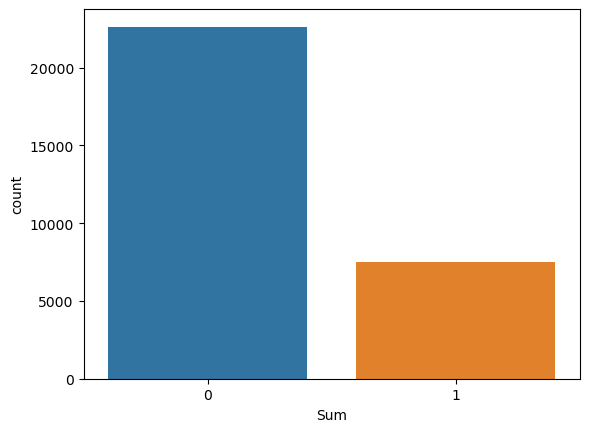

In [9]:
sns.countplot(x = 'Sum', data = dfcopy)

In [10]:
# create df of the numerical values and Sum to create multiple boxplots

df_numerical = dfdropd[['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Sum']].copy()

df_numerical.head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Sum
0,39,77516,13,2174,0,40,<=50K
1,50,83311,13,0,0,13,<=50K
2,38,215646,9,0,0,40,<=50K
3,53,234721,7,0,0,40,<=50K
4,28,338409,13,0,0,40,<=50K


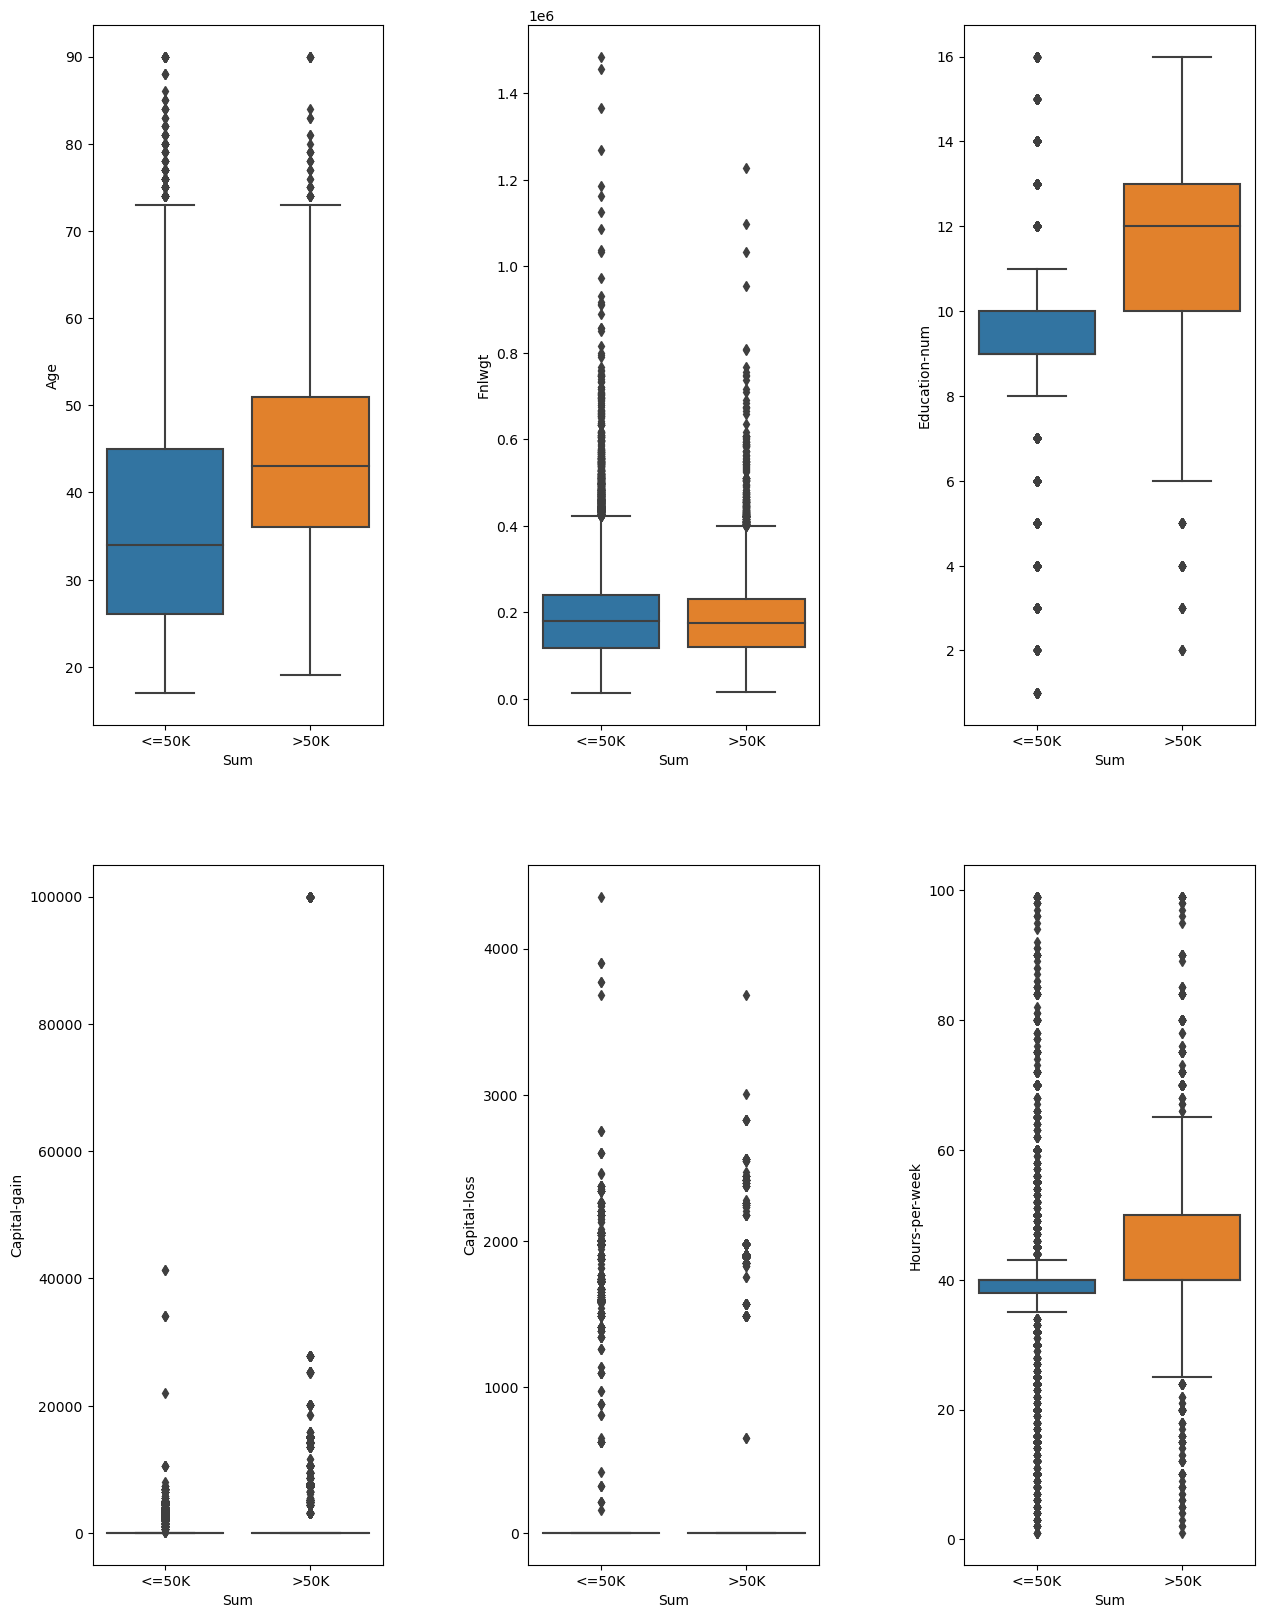

In [11]:
# plot boxplots 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()

for i, col in enumerate(df_numerical.columns[0:6]):
    _= sns.boxplot(y=col, x='Sum', data=df_numerical, ax=axes[i])

In [12]:
# from the boxplots it looks like fnlwgt is similar for both classes, so we may potentially drop that feature.
# also, captital-gain and capital-loss are mostly zero for both classes, so we could drop these as well due to low variability

#Now try to plot the categorical features 
#look at value counts first 

categorical_cols = ['Workclass', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

for col in categorical_cols:
    vals = dfdropd[[col]].value_counts()
    print(vals)
    
# data is skewed towards private sector, white race, males, and United States

Workclass       
Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
dtype: int64
Marital-Status       
Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
dtype: int64
Occupation       
Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
dtype: int64
Relationship  
Husband           12457
Not-in-family      7714
Own-child          4462
Unmarried          3211
Wife               1406
Other-

<AxesSubplot:xlabel='Sum', ylabel='Count'>

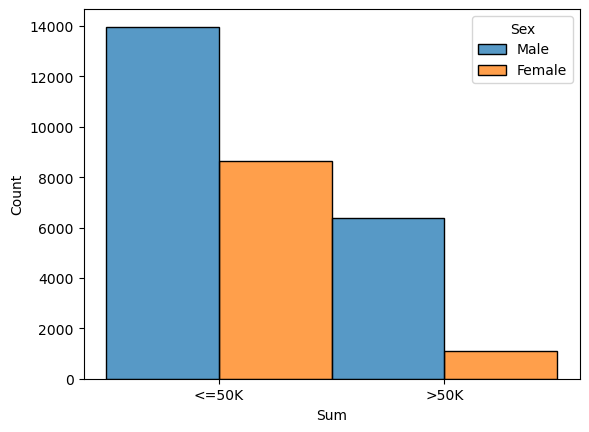

In [13]:
# will use histograms for all categorical features bar countries 
first_dim = 'Sum' 
second_dim = 'Sex'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# males tend to earn more than 50k however the data is skewed towards males 

<AxesSubplot:xlabel='Sum', ylabel='Count'>

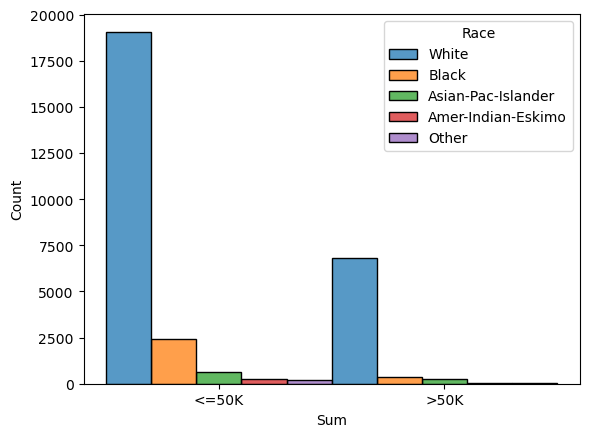

In [14]:
first_dim = 'Sum' 
second_dim = 'Race'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# again, data is heavily skewed towards White so hard to tell

<AxesSubplot:xlabel='Sum', ylabel='Count'>

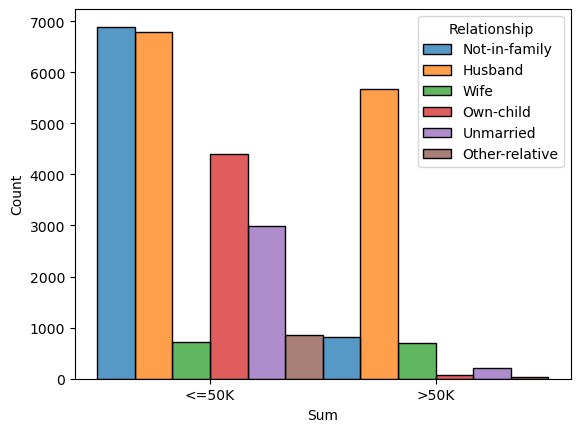

In [15]:
first_dim = 'Sum' 
second_dim = 'Relationship'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# can see husbands are more likely to earn over 50k, not-in-family and own child less likely - important feature

<AxesSubplot:xlabel='Sum', ylabel='Count'>

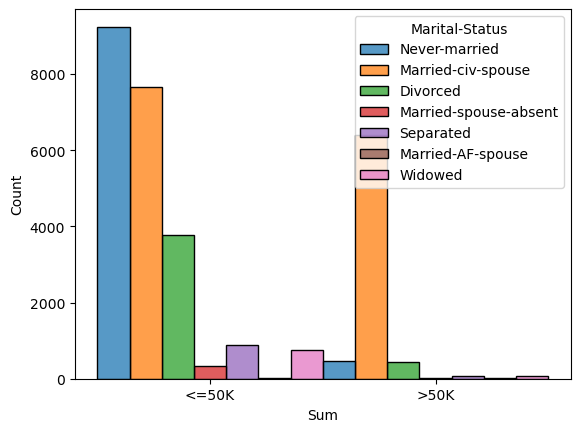

In [16]:
first_dim = 'Sum' 
second_dim = 'Marital-Status'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# Married-civ-spouse most liekly to earn over 50k, never-married and divorsed less likely, rest of data is smaller 
# in comparison 

<AxesSubplot:xlabel='Sum', ylabel='Count'>

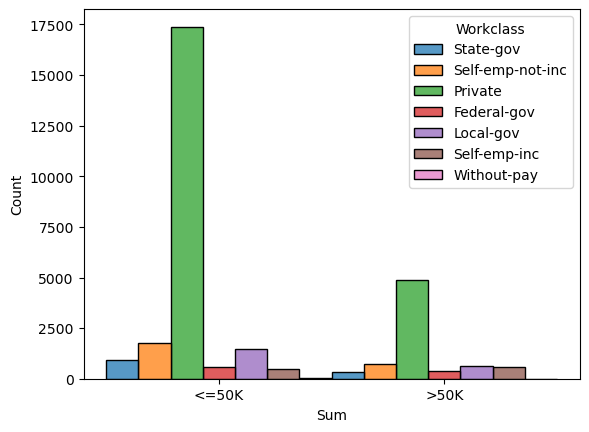

In [17]:
first_dim = 'Sum' 
second_dim = 'Workclass'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
#data skewed towards private secotr so hard to make judgement, similar results for both classes

<AxesSubplot:xlabel='Sum', ylabel='Count'>

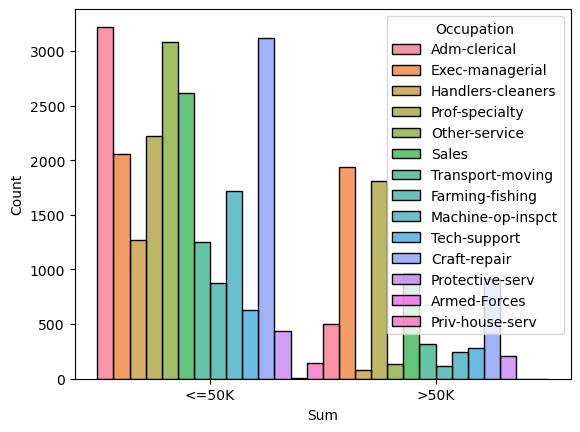

In [18]:
first_dim = 'Sum' 
second_dim = 'Occupation'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )

# exec- managerial and prof-speciality both most likely to earn over 50k, data well spread out - important feature. 

In [19]:
# split into X and y
X = dfcopy.drop(columns = ['Sum'])
y = dfcopy['Sum']

In [20]:
# split X and y into training and test sets, test set 30% of data 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1, stratify=y)


In [21]:
# First try SVM with all features selected 
from sklearn.svm import SVC 

svclassifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
svclassifier.fit(X_train, y_train)


SVC(gamma='auto', probability=True)

In [22]:
y_pred = svclassifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6790
           1       0.73      0.37      0.49      2252

    accuracy                           0.81      9042
   macro avg       0.78      0.66      0.69      9042
weighted avg       0.80      0.81      0.78      9042



In [24]:
classifier_score = svclassifier.score(X_test, y_test)
print(f"Classifier Score is {classifier_score}")

Classifier Score is 0.8090024330900243


In [25]:
# Try dropping features
# Drop Capital-gain and capital-loss due to low variability 
# Drop Education due to Education-num encoding similar data 
# Drop Native-country for low variability (mostly U.S)
# Drop Race for having lowest Chi-Squared statistic 

df_reduced = dfcopy.drop(columns = ['Capital-gain', 'Capital-loss', 'Education', 'Native-country', 'Race'])
df_reduced.head()

,Age,Workclass,Fnlwgt,Education-num,Marital-Status,Occupation,Relationship,Sex,Hours-per-week,Sum
0,39,5,-1.062676,13,4,0,1,1,40,0
1,50,4,-1.007829,13,2,3,0,1,13,0
2,38,2,0.244669,9,0,5,1,1,40,0
3,53,2,0.425206,7,2,5,0,1,40,0
4,28,2,1.406572,13,2,9,5,0,40,0


In [26]:
# split into X and y
X1 = df_reduced.drop(columns = ['Sum'])
y1 = df_reduced['Sum']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,
random_state=1, stratify=y)

In [27]:
svclassifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
svclassifier.fit(X1_train, y1_train)

SVC(gamma='auto', probability=True)

In [28]:
y1_pred = svclassifier.predict(X1_test)

In [29]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6790
           1       0.69      0.49      0.57      2252

    accuracy                           0.82      9042
   macro avg       0.77      0.71      0.73      9042
weighted avg       0.81      0.82      0.81      9042



In [30]:
## precision for 0 (<=50k) has increased however the precision for 1 (50k >) has decreased

classifier_score1 = svclassifier.score(X1_test, y1_test)
print(f"Classifier Score is {classifier_score1}")

Classifier Score is 0.8191771731917717


In [31]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# model with just 3 best features selected (k=3)
clf_fs_cv = Pipeline([
 ('feature_selector', SelectKBest(f_classif, k=3)),
 ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True))
])
scores = cross_val_score(clf_fs_cv, X, y, cv=5) # 5 folds.
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

[0.81702057 0.82149967 0.82465163 0.82929662 0.81898125]
Average score and standard deviation: (82.23 +- 0.194)%
